# Proyecto Final

In [43]:
import os
import numpy as np #popular library for scientific computing
import nibabel as nib
import matplotlib #plotting library compatible with numpy
import matplotlib.pyplot as plt 
import skimage
from skimage import io
from skimage import filters
from nilearn import datasets
from nilearn import plotting


import scipy.ndimage.filters as filters
from numba import njit, prange

import modules
%matplotlib inline

In [44]:
#img1 = nib.load(r'\Users\Maria\Desktop\data\sub-01\anat\sub-01_T1w.nii.gz')

In [45]:
img1 = sitk.ReadImage(r'\Users\Maria\Desktop\data\sub-01\anat\sub-01_T1w.nii.gz')

## 1.Pre-procesado

In [46]:
#resize
a = np.array(skimage.transform.resize(img1.dataobj, (120,160)))

AttributeError: 'Image' object has no attribute 'dataobj'

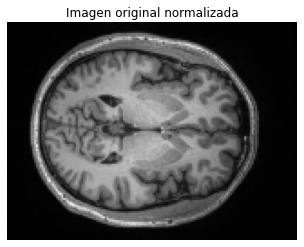

In [47]:
#normalizamos
img_gray= a[:,:,128]
#normalizo la imagen
img_o=img_gray
img_o=img_o/np.max(img_o)
plt.title('Imagen original normalizada'), plt.axis('off')
plt.imshow(img_o, cmap=plt.cm.gray)

In [48]:
#filtros suavizantes estándar??
def mean_filter(img,size_filter):

    # the filter is divided by size_filter^2 for normalization
    mean_filter = np.ones((size_filter,size_filter))/np.power(size_filter,2)
    # performing convolution
    img_meanfiltered = filters.convolve(img, mean_filter,mode='reflect')
    return img_meanfiltered


def median_filter(img, size):
    img_filtered = filters.median_filter(img,size = size,mode='reflect')
    return img_filtered

def gaussian_filter(img,sigma):
    # performing convolution
    img_gaussianfiltered = filters.gaussian_filter(img, sigma=sigma,mode='reflect')
    return img_gaussianfiltered


In [49]:
img_mean = mean_filter(img_o,2)
img_median = median_filter(img_o, 2)
img_gaussian_filter = gaussian_filter(img_o,0.75)

(Text(0.5, 1.0, 'Gaussian filtered image'), (-0.5, 159.5, 119.5, -0.5))

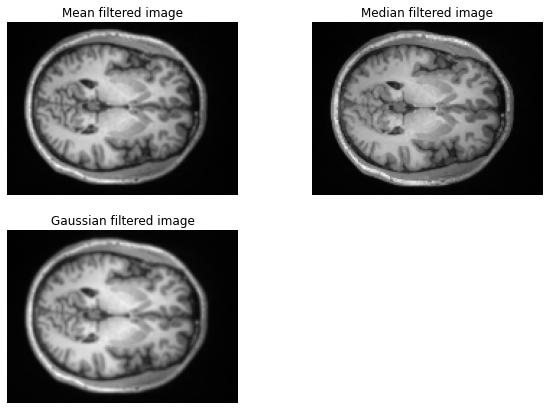

In [50]:
fig = plt.figure(figsize=(10,7))
plt.subplot(221)
plt.imshow(img_mean, cmap=plt.cm.gray)
plt.title('Mean filtered image'), plt.axis('off')
plt.subplot(222)
plt.imshow(img_median, cmap=plt.cm.gray)
plt.title('Median filtered image'), plt.axis('off')
plt.subplot(223)
plt.imshow(img_gaussian_filter, cmap=plt.cm.gray)
plt.title('Gaussian filtered image'), plt.axis('off')

In [51]:
## NLM - CPP

#padding
#img_pad = np.pad(img_o,1, mode='reflect')
#implementamos nlm
#nlm_cpp = modules.nlm_cpp(img_o, img_pad,0.5, 2, 2)

#plt.imshow(nlm_cpp, cmap=plt.cm.gray)

In [52]:
from skimage.restoration import denoise_nl_means, estimate_sigma
denoise_img = skimage.restoration.denoise_nl_means(img_pad, patch_size=3, h = 0.2)
plt.imshow(denoise_img, cmap=plt.cm.gray)

NameError: name 'img_pad' is not defined

# 2. Segmentación

Vamos a segmentar sustacia blanca, sustancia gris y líquido cefalorraquídeo:

In [53]:
%matplotlib auto
regiones = modules.RegionGrowingP2(img_o, 0.3, 0.1)
regiones2 = modules.RegionGrowingP2(img_o, 0.15, 0.1)
#líquido cefalorraquídeo
regiones3 = modules.RegionGrowingP2(img_o, 0.1, 0.15) 

Using matplotlib backend: Qt5Agg
Las coordenadas de las semillas son:  [70, 74]
Las coordenadas de las semillas son:  [74, 90]
Las coordenadas de las semillas son:  [87, 84]


(Text(0.5, 1.0, 'Líquido'), (-0.5, 159.5, 119.5, -0.5))

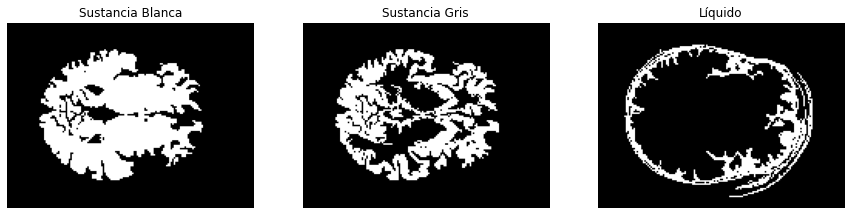

In [54]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(regiones, cmap=plt.cm.gray)

plt.title('Sustancia Blanca'), plt.axis('off')
plt.subplot(132)
plt.imshow(regiones2, cmap=plt.cm.gray)

plt.title('Sustancia Gris'), plt.axis('off')

plt.subplot(133)
plt.imshow(regiones3, cmap=plt.cm.gray)

plt.title('Líquido'), plt.axis('off')

(Text(0.5, 1.0, 'Líquido'), (-0.5, 159.5, 119.5, -0.5))

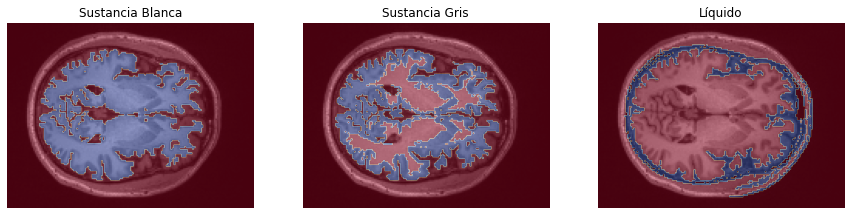

In [55]:
%matplotlib inline
fig = plt.figure(figsize=(15,10))
plt.subplot(131)
plt.imshow(img_o, cmap=plt.cm.gray)
plt.imshow(regiones, cmap='coolwarm_r', alpha=0.4)

plt.title('Sustancia Blanca'), plt.axis('off')
plt.subplot(132)
plt.imshow(img_o, cmap=plt.cm.gray)
plt.imshow(regiones2, cmap='coolwarm_r', alpha=0.4)

plt.title('Sustancia Gris'), plt.axis('off')

plt.subplot(133)
plt.imshow(img_o, cmap=plt.cm.gray)
plt.imshow(regiones3,cmap='coolwarm_r', alpha=0.4)

plt.title('Líquido'), plt.axis('off')

## Extraccion de Características
PyRadiomics para extraccion de características

In [56]:
import os  # needed navigate the system to get the input data

from radiomics import featureextractor  # This module is used for interaction with pyradiomics

In [57]:
from __future__ import print_function
import os
import collections
import SimpleITK as sitk
import numpy
import six
import radiomics
from radiomics import firstorder, glcm, imageoperations, shape, glrlm, glszm
from radiomics import shape2D


In [58]:

settings = {}
settings['binWidth'] = 25
settings['resampledPixelSpacing'] = None
# settings['resampledPixelSpacing'] = [3, 3, 3]  # This is an example for defining resampling (voxels with size 3x3x3mm)
settings['interpolator'] = 'sitkBSpline'
settings['verbose'] = True

In [69]:
img_arr = np.expand_dims(img_o, axis=0)

In [70]:
shapeFeatures = shape2D.RadiomicsShape2D(img_arr, regiones,label=255)
# Set the features to be calculated
# shapeFeatures.enableFeatureByName('Volume', True)
shapeFeatures.enableAllFeatures()

AttributeError: 'numpy.ndarray' object has no attribute 'GetPixelIDValue'

In [ ]:
# Print out the docstrings of the enabled features
print('Will calculate the following shape features: ')
for f in shapeFeatures.enabledFeatures.keys():
  print(f)
  print(getattr(shapeFeatures, 'get%sFeatureValue' % f).__doc__)

In [ ]:
# Calculate the features and print(out result)
print('Calculating shape features...',)
result = shapeFeatures.execute()
print('done')

print('Calculated shape features: ')
for (key, val) in six.iteritems(result):
  print('  ', key, ':', val)

## Clasificación

No tenemos etiquetas por lo que creemos que esjor aplicar métodos de aprendizaje no supervisado.

In [62]:
import glob
import os
import nibabel as nib 
import matplotlib.pyplot as plt

In [63]:
pwd=os.getcwd()
path='C:/Users/Maria/Desktop/data'

In [64]:
def show_slices(imagen):
    fig,axes=plt.subplots(1,len(imagen))
    for i,slice in enumerate(imagen):
        axes[i].imshow(slice.T,cmap='gray',origin='lower')
def get_frontal_samples(sub):
    print(sub+'/anat/'+sub+'_T1w.nii.gz')
    img1=nib.load(sub+'/anat'+sub+'_T1w.nii.gz')
    data=img1.get_fdata()
    affine=img1.affine
    
    slice_frontal=data[:,128,:]
    plt.imshow(slice_frontal)
    
print(os.path())

TypeError: 'module' object is not callable

In [39]:
def preprocess (path):
  or_images = []
  scaled_img = []
  for filename in os.listdir(path):
    if filename.endswith("nii.gz"):
        
      image = nib.load(path + '/'+ filename, as_gray = True)
      a = np.array(skimage.transform.resize(image, (300,300)))/np.max(image)
      or_images.append(a)
    
  return or_images

In [41]:

local_download_path = r'\Users\Maria\Desktop\data\sub-*'
pre_img = preprocess(local_download_path)

OSError: [WinError 123] El nombre de archivo, el nombre de directorio o la sintaxis de la etiqueta del volumen no son correctos: '\\Users\\Maria\\Desktop\\data\\sub-*'

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
X_train, X_test, Y_train, Y_test =  train_test_split(pre_img, y, train_size=0.8,test_size=0.2, random_state=0)

In [ ]:
x_train = X_train.reshape(160, 300, 300, 1)
x_test = X_test.reshape(40, 300, 300, 1)
print("Training matrix shape", x_train.shape)
print("Testing matrix shape", x_test.shape)

In [ ]:
model =tf.keras.applications.VGG16(
    include_top=True,
    weights=None,
    input_tensor=None,
    input_shape= (300, 300, 3),
    pooling=None,
    classes=1000,
    classifier_activation="softmax",
)

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(X_train_3c, Y_train, epochs=4)

model.evaluate(X_test_3c,  Y_test, verbose=2)